In [19]:
import matplotlib.pyplot as plt
import math
import csv
plt.rcParams.update({'font.size': 22})

In [20]:
num_chips = 16
alpha = 5 #propagation loss coefficient of waveguides [dB/m]
D_wafer = 0.3 #lenght of wafer diameter [m]
L_crossing = 0.02 #loss of single crossing [dB]
XT_crossing = 37 #crosstalk of single crossing [dB]
WG_len_max = 1.3 #m
WG_len_ave = 0.3 #m 

In [21]:
def dB2decimal(dB): # dB to decimal ratio
    return math.pow(10.0,-dB/10.0)

def decimal2dB(decimal): # decimal ratio to dB
    return 10*math.log10(decimal)

def approx_SNR_o(SNR_i, num_cross, propagation_loss):
    # input 1 and 3 are in [dB]
    # let P_i be 1
    Tot_attenation=num_cross*L_crossing+propagation_loss # [dB]
    N_o=dB2decimal(SNR_i)*1+num_cross*dB2decimal(XT_crossing)*1 # pessimistic: every crosstalk induce as much noise as possible
    N_o=N_o*dB2decimal(Tot_attenation) # all noise also go through all attenuation
    SNR_o=decimal2dB(dB2decimal(1*Tot_attenation)/N_o)
    return SNR_o

# def approx_SNR_o(SNR_i, num_cross, propagation_loss):
#     # input 1 and 3 are in [dB]
#     # let P_i be 1
#     Tot_attenation=num_cross*L_crossing+propagation_loss # [dB]
#     N_o=dB2decimal(SNR_i)*1+num_cross*dB2decimal(XT_crossing)*1*dB2decimal(Tot_attenation)*0.5 # pessimistic: every crosstalk induce as much noise as possible
#     SNR_o=decimal2dB(N_o/dB2decimal(1*Tot_attenation))
#     return SNR_o

# def approx_SNR_o(SNR_i, num_cross, propagation_loss):
#     # input 1 and 3 are in [dB]
#     # let P_i be 1
#     Tot_attenation=num_cross*L_crossing+propagation_loss # [dB]
#     N_o=1*dB2decimal(SNR_i)*dB2decimal(Tot_attenation)+num_cross*dB2decimal(XT_crossing)*1*dB2decimal(Tot_attenation) # pessimistic: every crosstalk induce as little noise as possible
#     SNR_o=decimal2dB(N_o/dB2decimal(1*Tot_attenation))
#     return SNR_o


In [22]:
# Initialize lists to store values
_BW_planarization = []
ave_crossing_planarization = []
approx_SNR_planarization=[]
# Read CSV file
with open('./planarization/config_1_uniform_planarization.csv', 'r') as file:
    reader = csv.DictReader(file)
    # Iterate through rows
    for row in reader:
        # Extract values and append to lists
        _BW_planarization.append(int(row['Theta[GBps]']))
        num_crossing = int(row['ave_crossing_per_wg'])
        ave_crossing_planarization.append(num_crossing)
        approx_SNR_planarization.append(approx_SNR_o(30, num_crossing, 5*1))


In [23]:
_BW_straight = []
ave_crossing_straight = []
approx_SNR_straight = []
# Read CSV file
with open('./straight/straight_crossing_config1.csv', 'r') as file:
    reader = csv.DictReader(file)
    # Iterate through rows
    for row in reader:
        # Extract values and append to lists
        _BW_straight.append(int(row['Theta[GBps]']))
        num_crossing = int(float(row['ave_crossing_per_wg']))
        ave_crossing_straight.append(num_crossing)
        approx_SNR_straight.append(approx_SNR_o(30, num_crossing, 5*0.3))

(700.0, 4100.0)

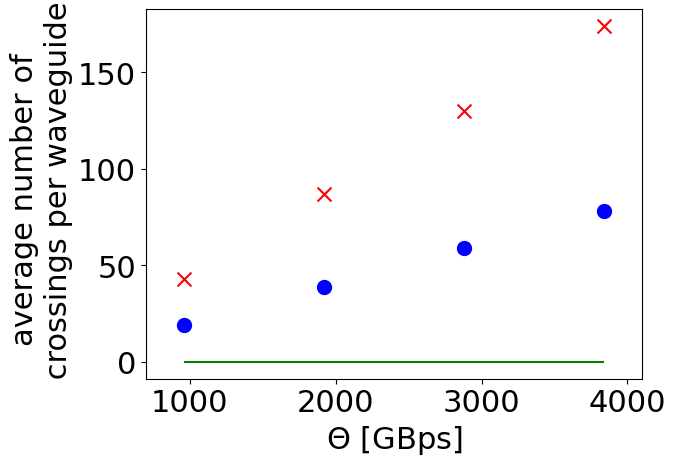

In [24]:
plt.hlines(0, _BW_straight[0], _BW_straight[-1], label="zero crossing", colors='g')
plt.scatter(_BW_planarization, ave_crossing_planarization, label="escape-planarization router", c='b', s=100)
plt.scatter(_BW_straight, ave_crossing_straight, label="escape-straight router", c='r', marker='x', s=100)
plt.xlabel('$\Theta$ [GBps]')
plt.ylabel('average number of \n crossings per waveguide')
# plt.title("(a) number of crossings per waveguide")
# plt.legend()
# plt.legend(loc='lower right' )
# plt.ylim(5,31)
plt.xlim(700,4100)

(10.0, 31.0)

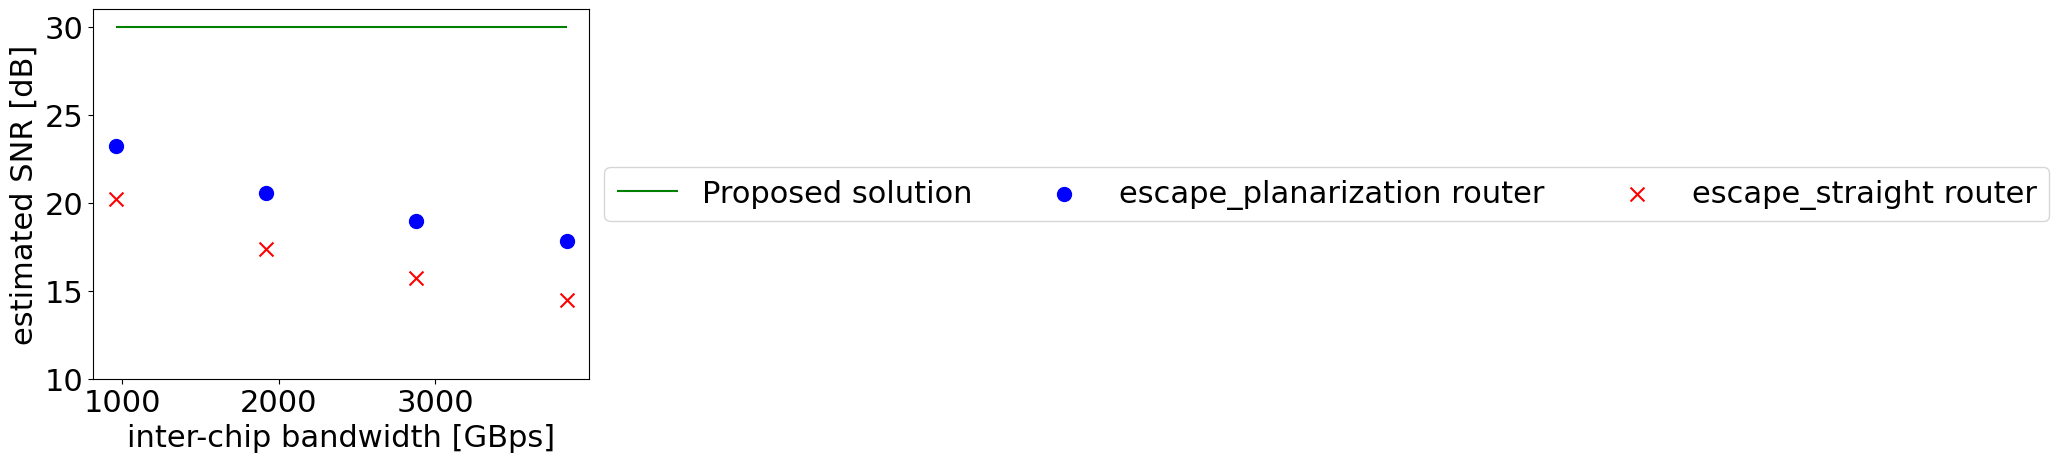

In [29]:
plt.hlines(30, _BW_straight[0], _BW_straight[-1], label="Proposed solution", colors='g')
plt.scatter(_BW_planarization, approx_SNR_planarization, label="escape_planarization router", c='b', s=100)
plt.scatter(_BW_straight, approx_SNR_straight, label="escape_straight router", c='r', marker='x', s=100)
plt.xlabel('inter-chip bandwidth [GBps]')
plt.ylabel('estimated SNR [dB]')
# plt.title("(b) estimated Signal-to-Noise ratio")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)
# plt.legend(loc='lower right' )
plt.ylim(10,31)

In [26]:
approx_SNR_planarization

[23.195739743199823,
 20.564301554539828,
 18.937394695794133,
 17.808597904986055]

In [27]:
approx_SNR_straight

[20.18651357362306, 17.361561318123815, 15.696280399240887, 14.471181650025265]